Для наборов данных необходимо решить задачи ниже:
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
масштабирование признаков (не менее чем тремя способами);

*   масштабирование признаков (не менее чем тремя способами);
*   обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
*   обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
*   отбор признаков, один метод из группы: методов фильтрации (filter methods), методов обертывания (wrapper methods), методов вложений (embedded methods).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

%matplotlib inline
sns.set(style="ticks")

**Описание набора данных**

HTRU2 - это набор данных, описывающий выборку потенциальных пульсаров,собранных в ходе исследования Вселенной с высоким временным разрешением (South).

Представленный набор данных содержит 16 259 ложных примеров, вызванных радиочастотными помехами, и 1 639 реальных примеров пульсаров. Все эти примеры были проверены комментаторами-людьми.

In [ ]:
data = arff.loadarff('HTRU_2.arff')
data_loaded = pd.DataFrame(data[0])

In [ ]:
data = data_loaded

In [ ]:
list(zip(data.columns, [i for i in data.dtypes]))

[('Profile_mean', dtype('float64')),
 ('Profile_stdev', dtype('float64')),
 ('Profile_skewness', dtype('float64')),
 ('Profile_kurtosis', dtype('float64')),
 ('DM_mean', dtype('float64')),
 ('DM_stdev', dtype('float64')),
 ('DM_skewness', dtype('float64')),
 ('DM_kurtosis', dtype('float64')),
 ('class', dtype('O'))]

In [ ]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

[]

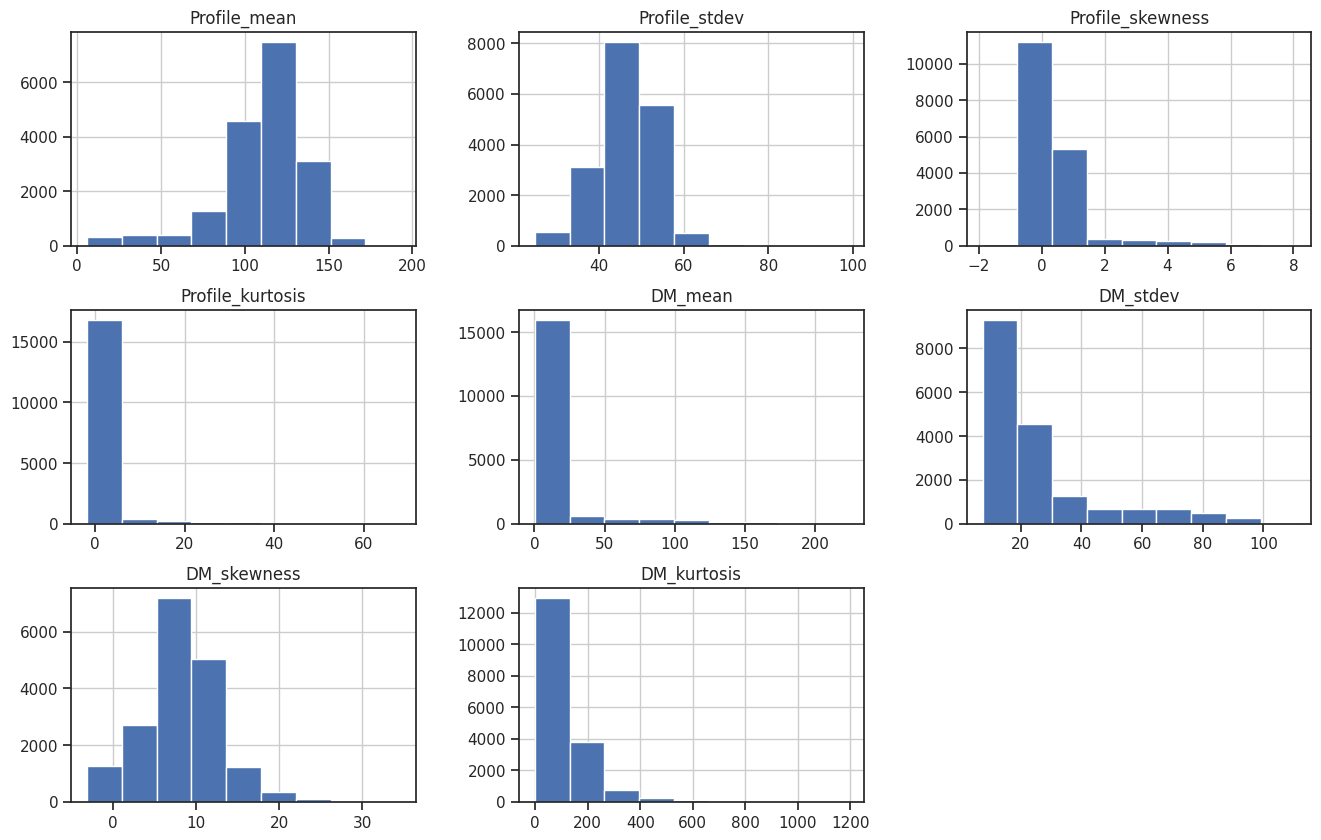

In [ ]:
data.hist(bins=9, figsize=(16,10))
plt.show()

In [ ]:
X_ALL = data.drop('class', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
data['class']=pd.to_numeric(data['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['class'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((14318, 8), (3580, 8))

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

Масштабирование данных на основе Z-оценки

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

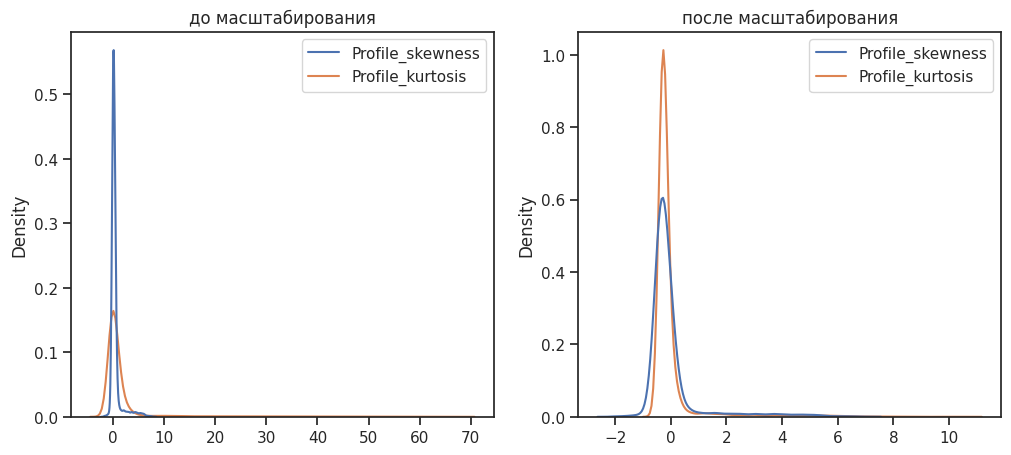

In [ ]:
draw_kde(['Profile_skewness', 'Profile_kurtosis'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

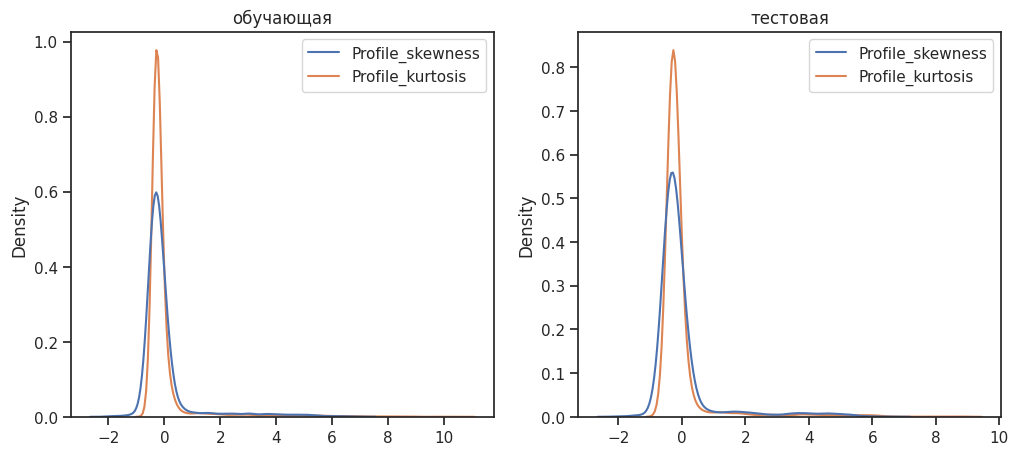

In [ ]:
draw_kde(['Profile_skewness', 'Profile_kurtosis'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


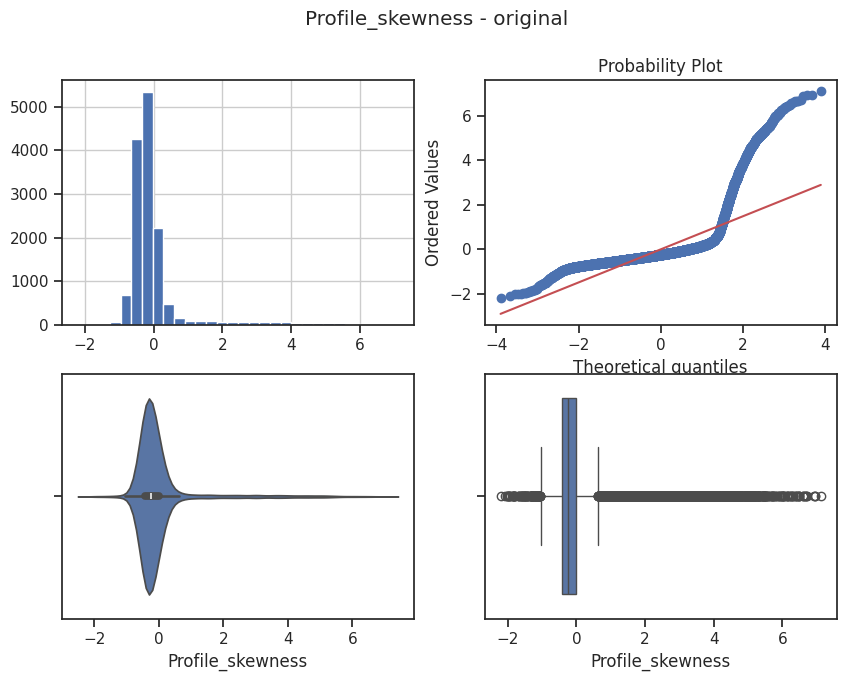

In [ ]:
diagnostic_plots(data_cs12_scaled_train, 'Profile_skewness', 'Profile_skewness - original')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


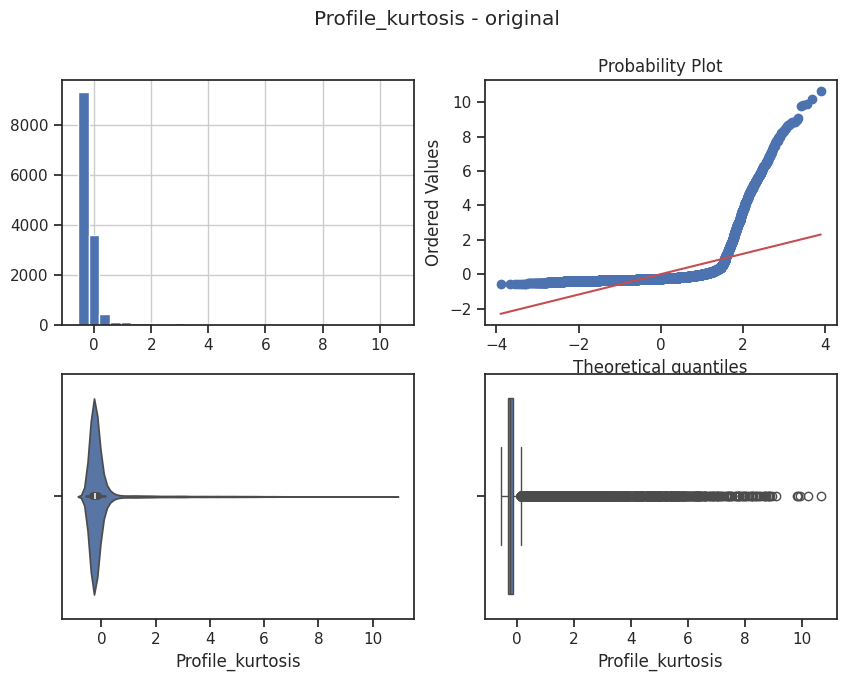

In [ ]:
diagnostic_plots(data_cs12_scaled_train, 'Profile_kurtosis', 'Profile_kurtosis - original')

Масштабирование "Mean Normalisation"

In [ ]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,-0.000046,0.000508,-0.000076,-0.000210,0.000375,-0.000631,0.000473,0.000383
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285
min,-0.563562,-0.293755,-0.236752,-0.051175,-0.055192,-0.184186,-0.303218,-0.089170
25%,-0.054382,-0.055886,-0.045399,-0.028236,-0.047530,-0.115756,-0.066462,-0.058207
50%,0.021357,0.005885,-0.025678,-0.022695,-0.043593,-0.076791,0.003923,-0.017885
75%,0.085637,0.060957,-0.000532,-0.012264,-0.031663,0.019719,0.064153,0.029262
max,0.436438,0.706245,0.763248,0.948825,0.944808,0.815814,0.696782,0.910830


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

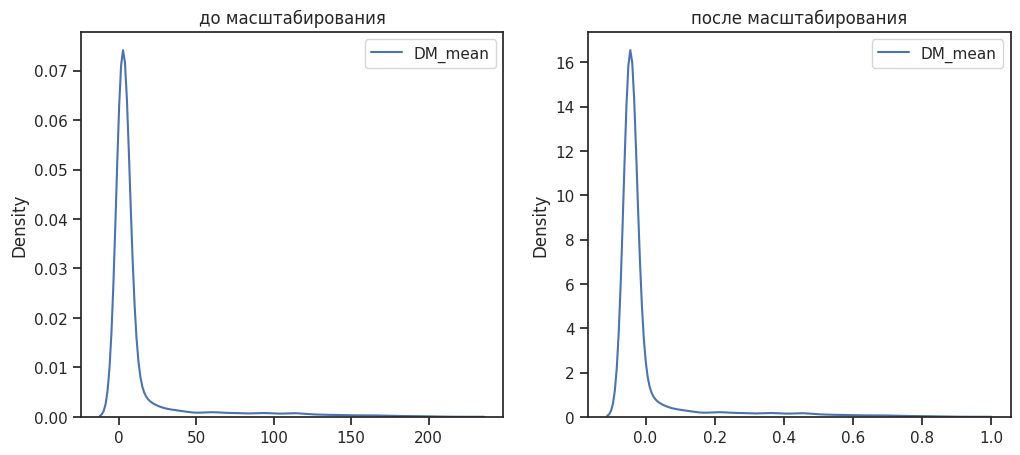

In [ ]:
draw_kde(['DM_mean'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

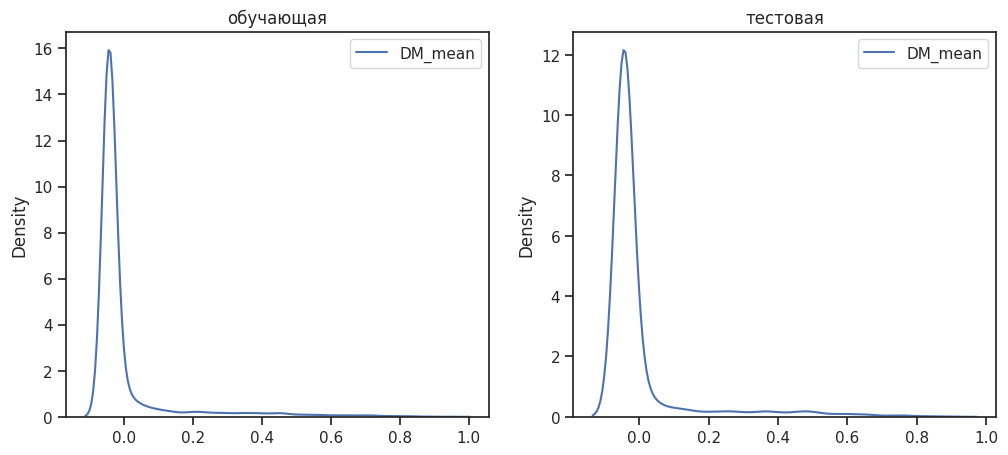

In [ ]:
draw_kde(['DM_mean'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


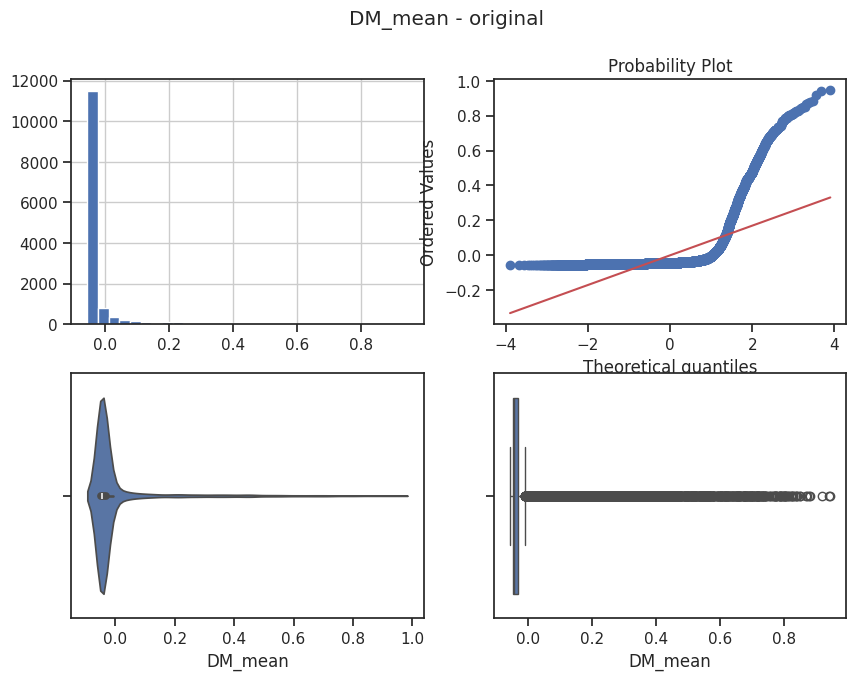

In [ ]:
diagnostic_plots(data_cs22_scaled_train, 'DM_mean', 'DM_mean - original')

MinMax-масштабирование

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.563516,0.294263,0.236676,0.050966,0.055566,0.183555,0.303691,0.089553
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509180,0.237869,0.191353,0.022939,0.007661,0.068430,0.236757,0.030962
50%,0.584919,0.299640,0.211075,0.028480,0.011599,0.107395,0.307141,0.071285
75%,0.649199,0.354712,0.236220,0.038912,0.023528,0.203905,0.367371,0.118432
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

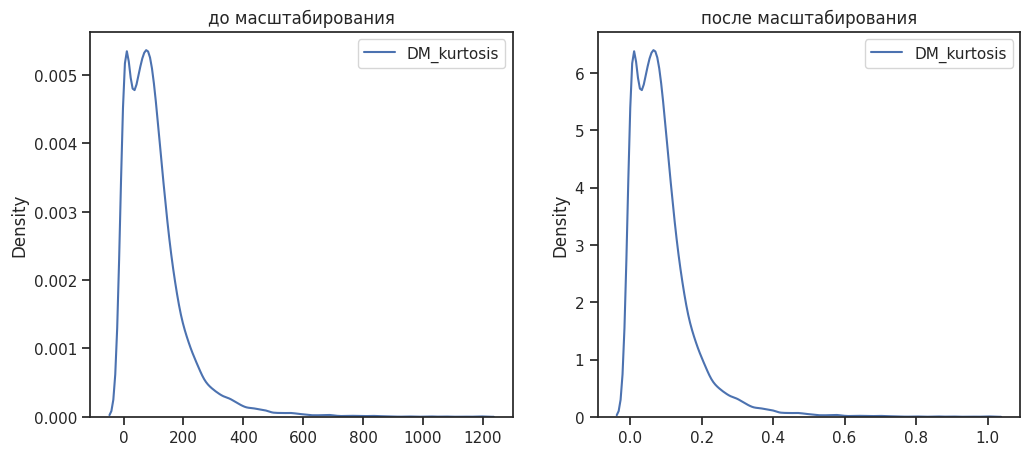

In [ ]:
draw_kde(['DM_kurtosis'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

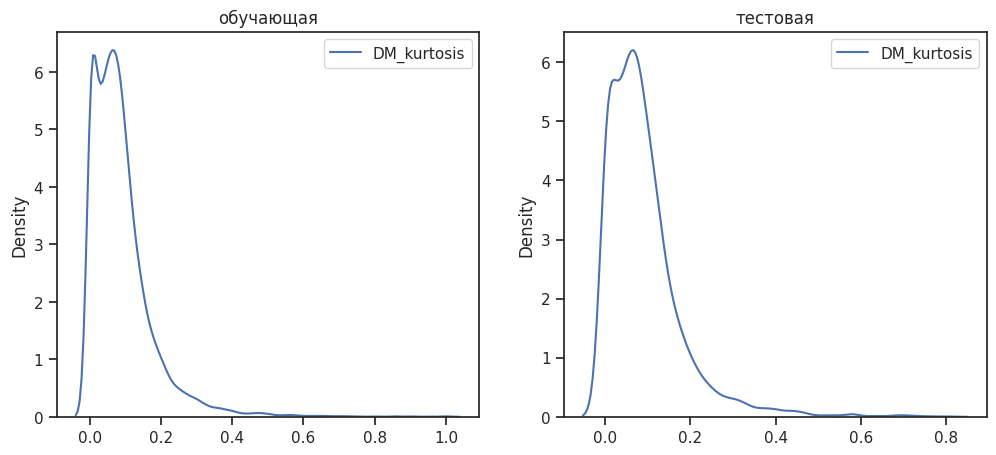

In [ ]:
draw_kde(['DM_kurtosis'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


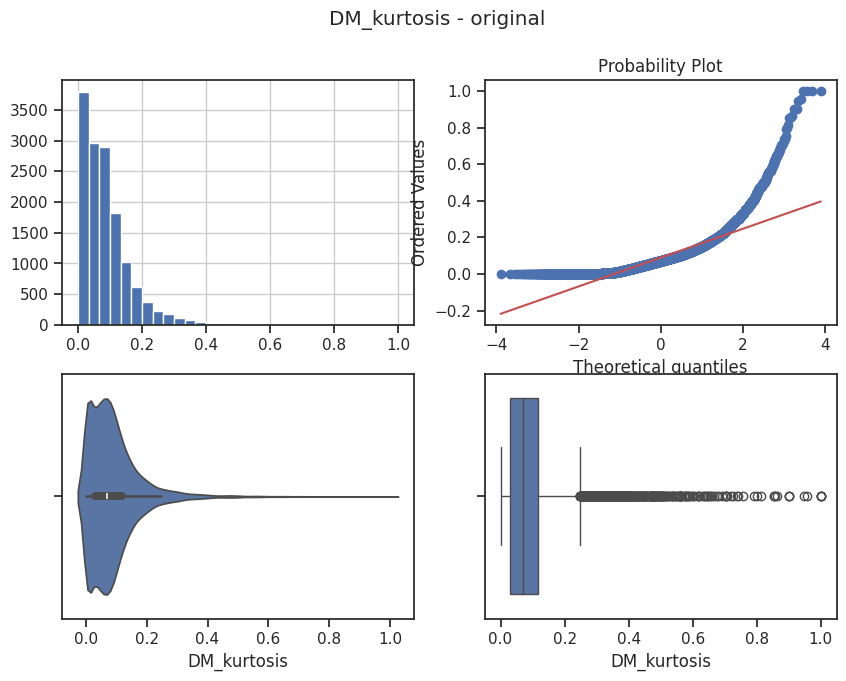

In [ ]:
diagnostic_plots(data_cs32_scaled_train, 'DM_kurtosis', 'DM_kurtosis - original')

Масштабирование по медиане

In [ ]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,1.789800e+04,1.789800e+04,1.789800e+04,17898.000000,1.789800e+04,17898.000000,17898.000000
mean,-0.152857,-4.602048e-02,5.706002e-01,1.407768e+00,2.770987,5.621705e-01,-0.026407,0.208849
std,0.980757,7.913778e-01,2.384525e+00,5.525048e+00,8.322905,1.391672e+00,0.915602,1.020755
min,-4.177419,-2.564469e+00,-4.704446e+00,-1.783122e+00,-0.731008,-7.927284e-01,-2.351497,-0.814974
25%,-0.540920,-5.286647e-01,-4.395563e-01,-3.469167e-01,-0.248155,-2.876170e-01,-0.538867,-0.460993
50%,0.000000,-4.108584e-16,3.110009e-17,1.243444e-17,0.000000,1.269601e-16,0.000000,0.000000
75%,0.459080,4.713353e-01,5.604437e-01,6.530833e-01,0.751845,7.123830e-01,0.461133,0.539007
max,2.964456,5.994024e+00,1.758361e+01,6.082557e+01,62.292899,6.588692e+00,5.304597,10.617621


In [ ]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

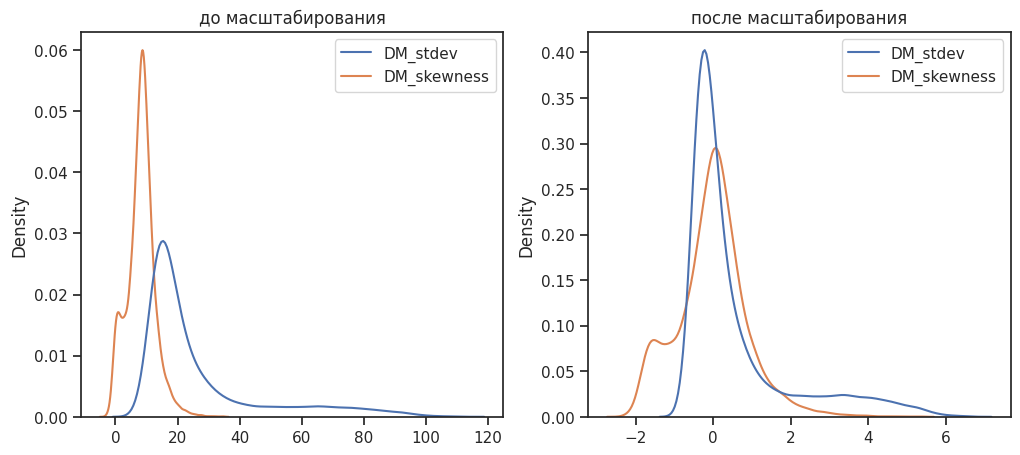

In [ ]:
draw_kde(['DM_stdev', 'DM_skewness'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

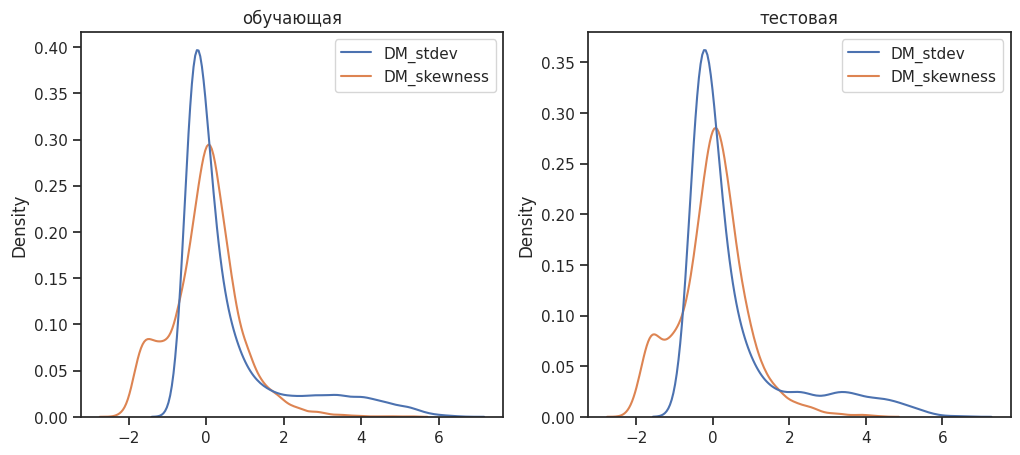

In [ ]:
draw_kde(['DM_stdev', 'DM_skewness'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


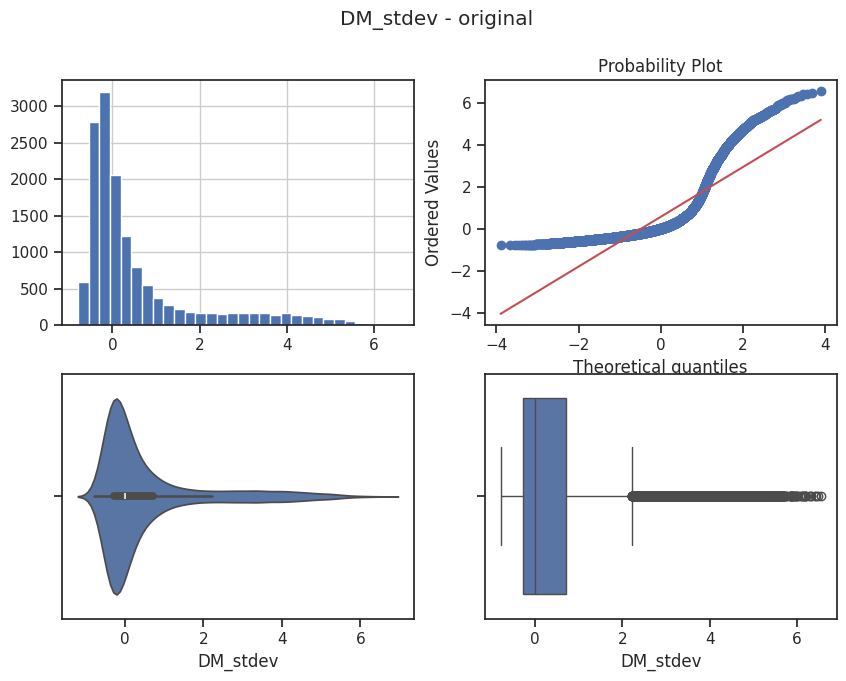

In [ ]:
diagnostic_plots(data_cs42_scaled_train, 'DM_stdev', 'DM_stdev - original')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


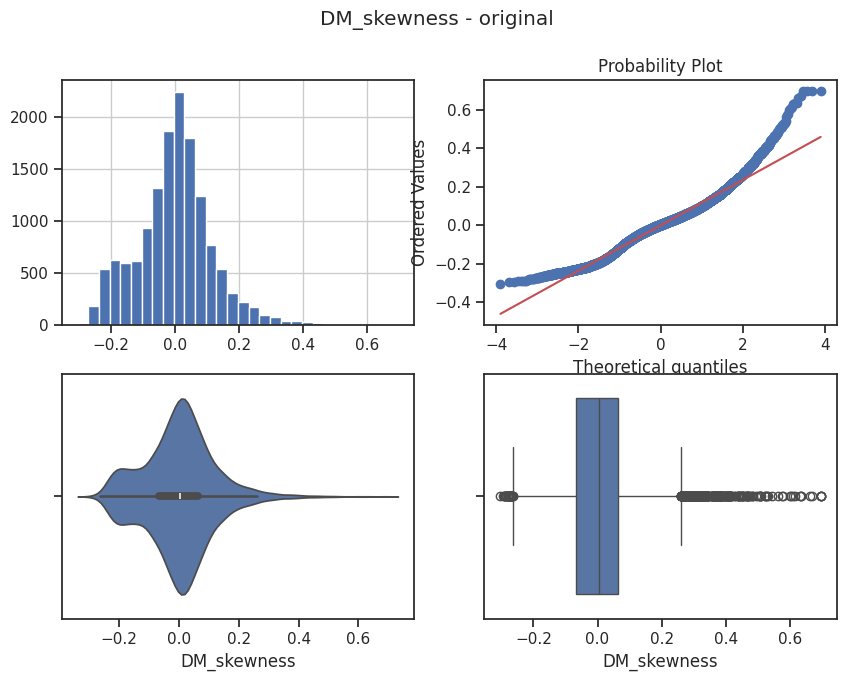

In [ ]:
diagnostic_plots(data_cs22_scaled_train, 'DM_skewness', 'DM_skewness - original')

Удаление выбросов

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


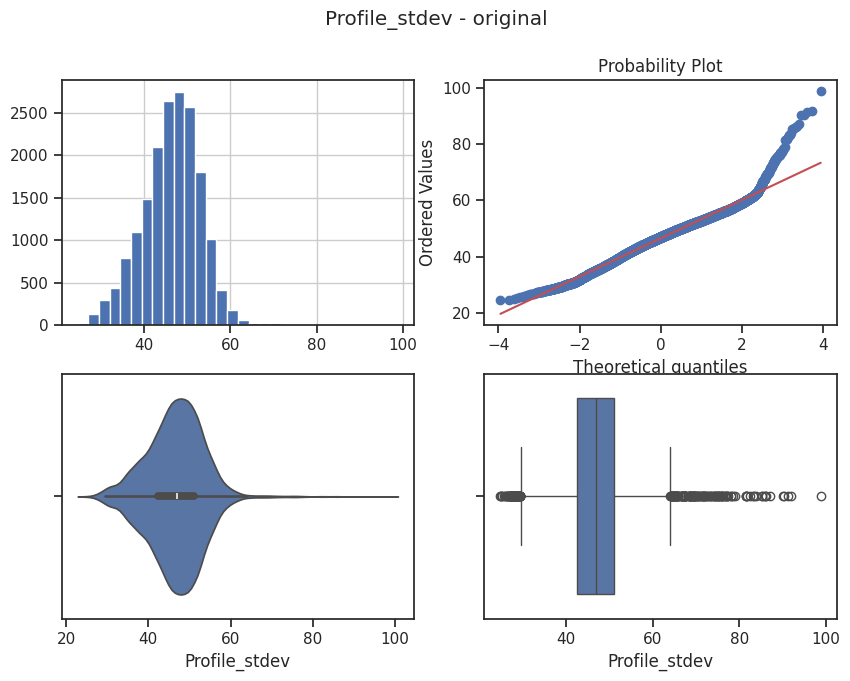

In [ ]:
diagnostic_plots(data, 'Profile_stdev', 'Profile_stdev - original')

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    K = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K * IQR)
    upper_boundary = df[col].quantile(0.75) + (K * IQR)
    return lower_boundary, upper_boundary

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


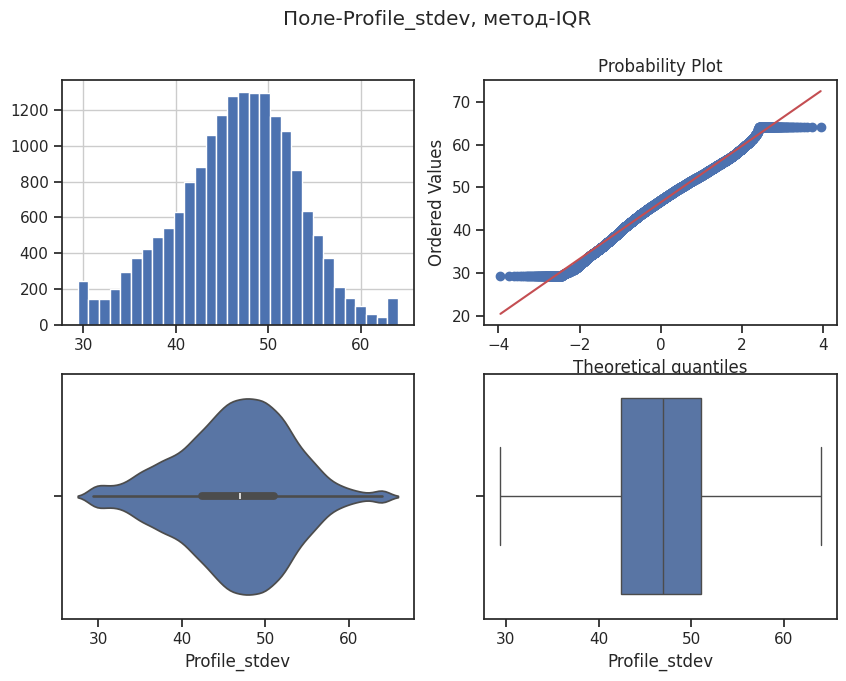

In [ ]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data,'Profile_stdev')
# Изменение данных
data['Profile_stdev'] = np.where(data['Profile_stdev'] > upper_boundary, upper_boundary,
                 np.where(data['Profile_stdev'] < lower_boundary, lower_boundary, data['Profile_stdev']))
title = 'Поле-{}, метод-{}'.format('Profile_stdev', 'IQR')
diagnostic_plots(data, 'Profile_stdev', title)

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


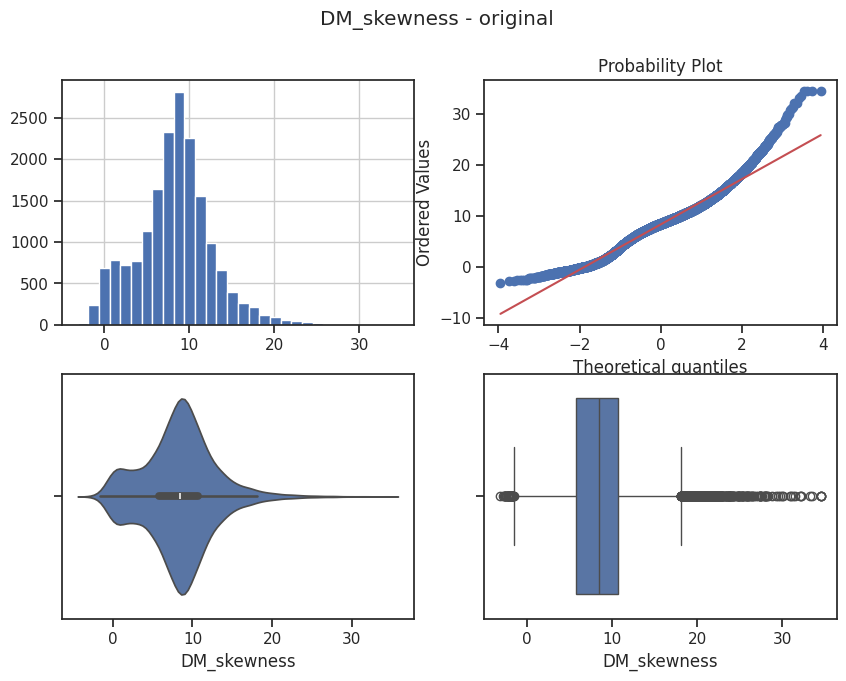

In [ ]:
diagnostic_plots(data, 'DM_kurtosis', 'DM_kurtosis - original')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


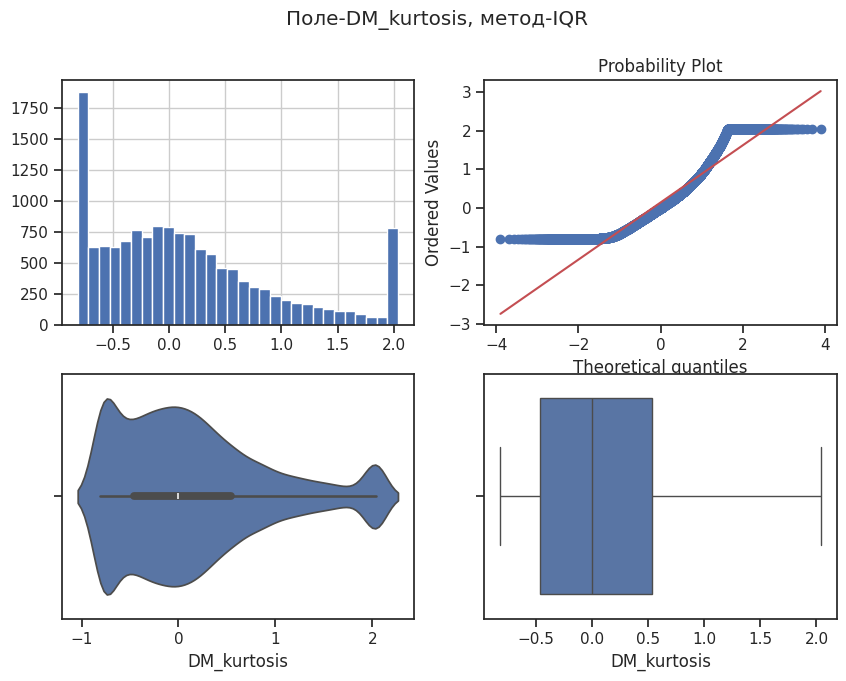

In [ ]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data_cs42_scaled_train,'DM_kurtosis')
# Изменение данных
data_cs42_scaled_train['DM_kurtosis'] = np.where(data_cs42_scaled_train['DM_kurtosis'] > upper_boundary, upper_boundary,
                 np.where(data_cs42_scaled_train['DM_kurtosis'] < lower_boundary, lower_boundary, data_cs42_scaled_train['DM_kurtosis']))
title = 'Поле-{}, метод-{}'.format('DM_kurtosis', 'IQR')
diagnostic_plots(data_cs42_scaled_train, 'DM_kurtosis', title)

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


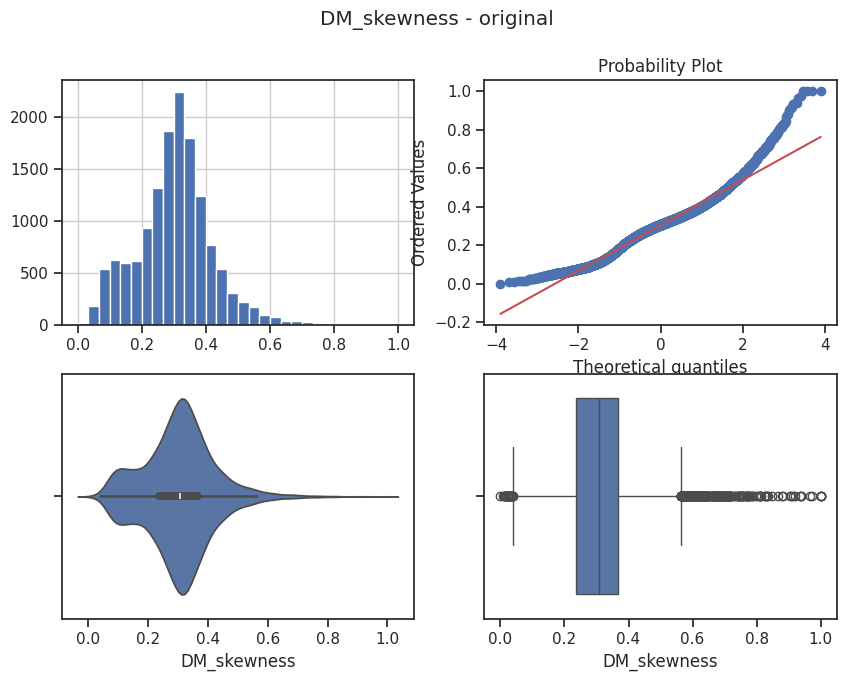

In [ ]:
diagnostic_plots(data_cs32_scaled_train, 'DM_skewness', 'DM_skewness - original')

<ipython-input-169-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


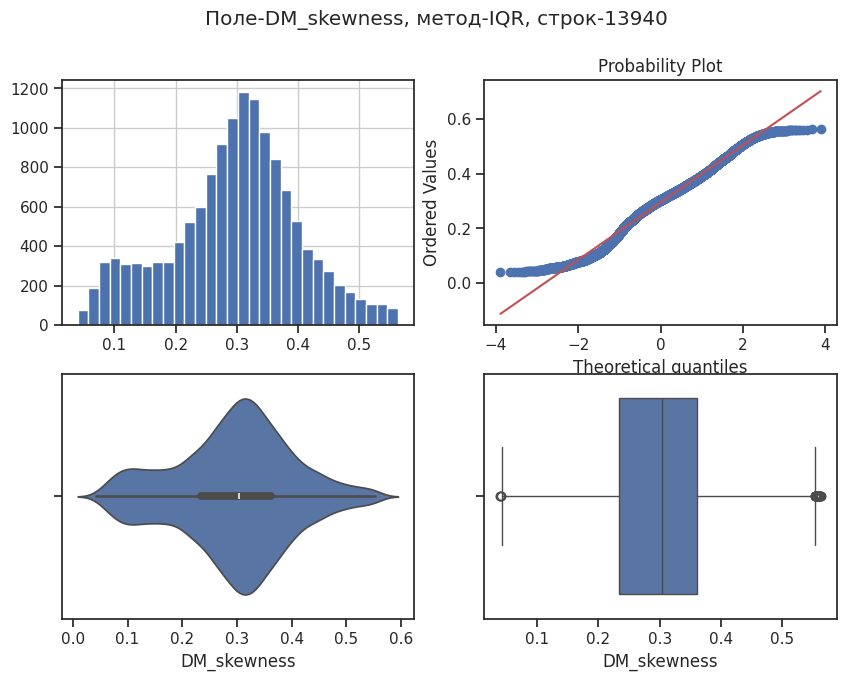

In [ ]:
#for col in x_col_list:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data_cs32_scaled_train, 'DM_skewness')
# Флаги для удаления выбросов
outliers_temp = np.where(data_cs32_scaled_train['DM_skewness'] > upper_boundary, True,
                                 np.where(data_cs32_scaled_train['DM_skewness'] < lower_boundary, True, False))
 # Удаление данных на основе флага
data_trimmed = data_cs32_scaled_train.loc[~(outliers_temp), ]
title = 'Поле-{}, метод-{}, строк-{}'.format('DM_skewness', 'IQR', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'DM_skewness', title)

Обработка нестандартного признака

In [ ]:
data_loaded = pd.read_csv('wordpress_ddos_log_transform.csv', sep=",")

In [ ]:
list(zip(data_loaded.columns, [i for i in data.dtypes]))

[('Unnamed: 0', dtype('float64')),
 ('IP adress', dtype('float64')),
 ('Port', dtype('float64')),
 ('Wordpress Version', dtype('float64')),
 ('Website', dtype('float64')),
 ('DT', dtype('float64')),
 ('Time', dtype('float64'))]

In [ ]:
data_loaded.head()

,Unnamed: 0,IP adress,Port,Wordpress Version,Website,DT,Time
0,0,188.121.41.140,"['200', '8955']",WordPress/3.0.2;,http://www.cakefantasia.com,23/Sep/2013,13:02:47
1,1,81.169.144.135,"['200', '8955']",WordPress/3.6.1;,http://aifs2.pvdveen.net,23/Sep/2013,13:02:47
2,2,91.184.18.50,"['200', '8955']",WordPress/3.5.1;,http://sociedia.com,23/Sep/2013,13:02:47
3,3,184.154.224.17,"['200', '8955']",WordPress/3.6;,http://photekusa.com,23/Sep/2013,13:02:47
4,4,209.15.245.58,"['200', '8955']",WordPress/3.5.2;,http://enabledkids.ca,23/Sep/2013,13:02:47


In [ ]:
def ip_code(ip, level):
    arr = ip.split('.')
    if level > 4:
        level=4
    if level == 1:
        return arr[0]
    else:
        return '_'.join(arr[:level])

In [ ]:
ip_features = []
for i in range(4):
    f = str('ip_' + str(i+1))
    data_loaded[f] = data_loaded.apply(lambda x: ip_code(x['IP adress'], i+1), axis=1)
    ip_features.append(f)
ip_features

['ip_1', 'ip_2', 'ip_3', 'ip_4']

In [ ]:
data_loaded.head()

,Unnamed: 0,IP adress,Port,Wordpress Version,Website,DT,Time,ip_1,ip_2,ip_3,ip_4
0,0,188.121.41.140,"['200', '8955']",WordPress/3.0.2;,http://www.cakefantasia.com,23/Sep/2013,13:02:47,188,188_121,188_121_41,188_121_41_140
1,1,81.169.144.135,"['200', '8955']",WordPress/3.6.1;,http://aifs2.pvdveen.net,23/Sep/2013,13:02:47,81,81_169,81_169_144,81_169_144_135
2,2,91.184.18.50,"['200', '8955']",WordPress/3.5.1;,http://sociedia.com,23/Sep/2013,13:02:47,91,91_184,91_184_18,91_184_18_50
3,3,184.154.224.17,"['200', '8955']",WordPress/3.6;,http://photekusa.com,23/Sep/2013,13:02:47,184,184_154,184_154_224,184_154_224_17
4,4,209.15.245.58,"['200', '8955']",WordPress/3.5.2;,http://enabledkids.ca,23/Sep/2013,13:02:47,209,209_15,209_15_245,209_15_245_58


In [ ]:
df_ip = pd.get_dummies(data_loaded[ip_features])
df_ip.shape

(569, 906)

In [ ]:
df_ip.head()

,ip_1_101,ip_1_103,ip_1_105,ip_1_107,ip_1_108,ip_1_109,ip_1_128,ip_1_129,ip_1_130,ip_1_137,...,ip_4_97_74_198_204,ip_4_97_74_215_122,ip_4_97_74_215_37,ip_4_97_74_24_139,ip_4_97_74_24_215,ip_4_97_74_24_23,ip_4_97_74_24_35,ip_4_97_74_24_44,ip_4_97_79_236_254,ip_4_99_198_124_194
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for col in df_ip:
    print(col, df_ip[col].unique(), len(df_ip[col].unique()))

ip_1_101 [False  True] 2
ip_1_103 [False  True] 2
ip_1_105 [False  True] 2
ip_1_107 [False  True] 2
ip_1_108 [False  True] 2
ip_1_109 [False  True] 2
ip_1_128 [False  True] 2
ip_1_129 [False  True] 2
ip_1_130 [False  True] 2
ip_1_137 [False  True] 2
ip_1_140 [False  True] 2
ip_1_141 [False  True] 2
ip_1_142 [False  True] 2
ip_1_146 [False  True] 2
ip_1_155 [False  True] 2
ip_1_163 [False  True] 2
ip_1_166 [False  True] 2
ip_1_168 [False  True] 2
ip_1_172 [False  True] 2
ip_1_173 [False  True] 2
ip_1_174 [False  True] 2
ip_1_176 [False  True] 2
ip_1_178 [False  True] 2
ip_1_18 [False  True] 2
ip_1_182 [False  True] 2
ip_1_184 [False  True] 2
ip_1_188 [ True False] 2
ip_1_192 [False  True] 2
ip_1_193 [False  True] 2
ip_1_194 [False  True] 2
ip_1_195 [False  True] 2
ip_1_198 [False  True] 2
ip_1_199 [False  True] 2
ip_1_203 [False  True] 2
ip_1_205 [False  True] 2
ip_1_208 [False  True] 2
ip_1_209 [False  True] 2
ip_1_211 [False  True] 2
ip_1_212 [False  True] 2
ip_1_213 [False  True] 2
i

Метод фильтрации

In [ ]:
'Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis', 'DM_mean','DM_stdev','DM_skewness','DM_kurtosis'

('Profile_mean',
 'Profile_stdev',
 'Profile_skewness',
 'Profile_kurtosis',
 'DM_mean',
 'DM_stdev',
 'DM_skewness',
 'DM_kurtosis')

<Axes: >

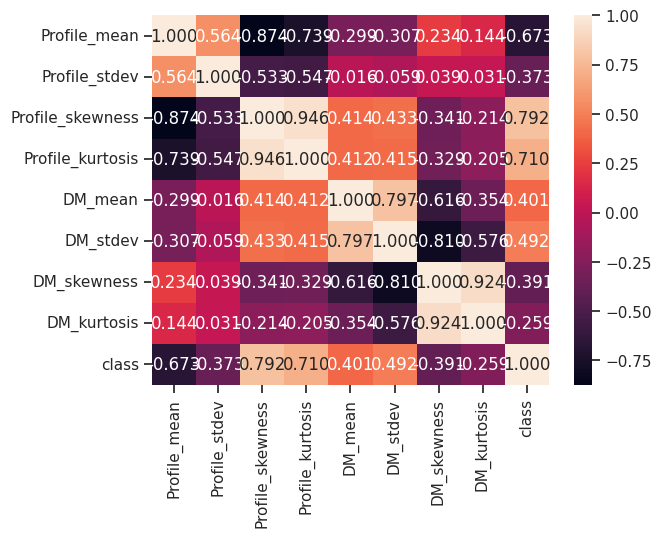

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(data)

,f1,f2,corr
0,Profile_kurtosis,Profile_skewness,0.945729
1,Profile_skewness,Profile_kurtosis,0.945729
2,DM_kurtosis,DM_skewness,0.923743
3,DM_skewness,DM_kurtosis,0.923743
4,Profile_skewness,Profile_mean,0.873898
5,Profile_mean,Profile_skewness,0.873898
6,DM_stdev,DM_skewness,0.809786
7,DM_skewness,DM_stdev,0.809786


In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Profile_skewness', 'Profile_kurtosis'],
 ['DM_skewness', 'DM_kurtosis'],
 ['Profile_skewness', 'Profile_mean'],
 ['DM_skewness', 'DM_stdev']]

In [ ]:
htru_x=data.drop('class', axis=1)
htru_y=data['class']

In [ ]:
htru_feature_names=['Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis', 'DM_mean','DM_stdev','DM_skewness','DM_kurtosis']

Text(0, 0.5, 'Взаимная информация')

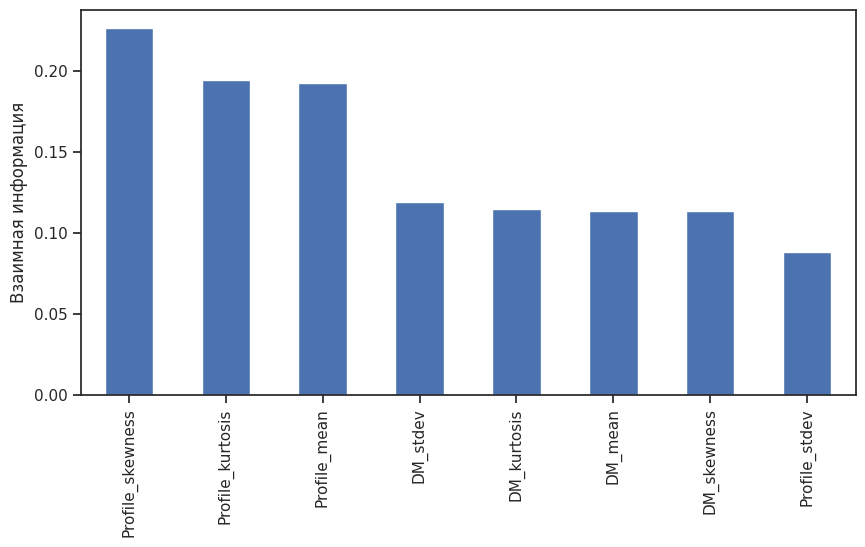

In [ ]:
mi = mutual_info_regression(htru_x, htru_y)
mi = pd.Series(mi)
mi.index = htru_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(htru_x, htru_y)

list(zip(htru_feature_names, sel_mi.get_support()))

[('Profile_mean', True),
 ('Profile_stdev', False),
 ('Profile_skewness', True),
 ('Profile_kurtosis', True),
 ('DM_mean', False),
 ('DM_stdev', True),
 ('DM_skewness', False),
 ('DM_kurtosis', True)]

Text(0, 0.5, 'Взаимная информация')

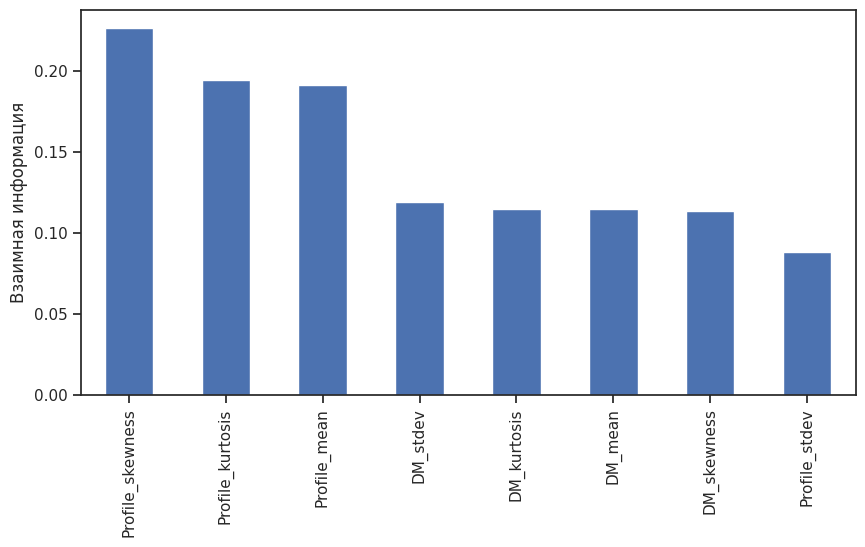

In [ ]:
mi = mutual_info_classif(htru_x, htru_y)
mi = pd.Series(mi)
mi.index = htru_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_classif, k=5).fit(htru_x, htru_y)

list(zip(htru_feature_names, sel_mi.get_support()))

[('Profile_mean', True),
 ('Profile_stdev', False),
 ('Profile_skewness', True),
 ('Profile_kurtosis', True),
 ('DM_mean', False),
 ('DM_stdev', True),
 ('DM_skewness', False),
 ('DM_kurtosis', True)]

Метод обертывания

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(htru_x, htru_y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 154/154

Best accuracy score: 0.98
Best subset (indices): (1, 2, 3, 6)
Best subset (corresponding names): ('Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_skewness')


In [ ]:
efs2 = EFS(knn,
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(htru_x, htru_y)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 36/36

Best accuracy score: 0.98
Best subset (indices): (1, 2)
Best subset (corresponding names): ('Profile_stdev', 'Profile_skewness')


Метод вложений

In [ ]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(htru_x, htru_y)
rfc1.fit(htru_x, htru_y)
gbc1.fit(htru_x, htru_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.03028793, 0.02878923, 0.80801826, 0.02327763, 0.02265715,
        0.0505185 , 0.02108859, 0.01536271]),
 1.0000000000000002)

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

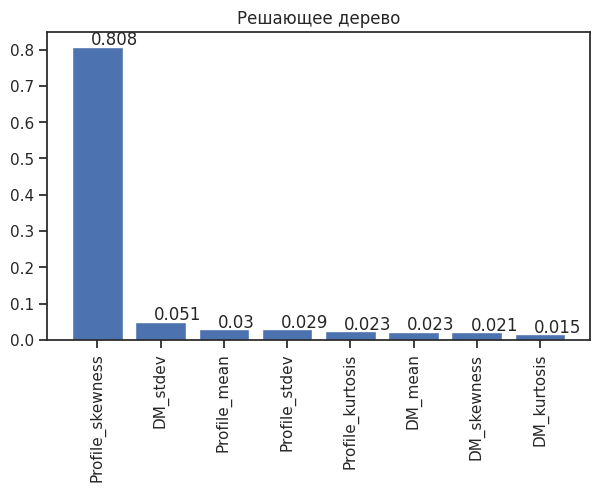

In [ ]:
_,_=draw_feature_importances(dtc1, htru_x, 'Решающее дерево')

In [ ]:
list(zip(htru_feature_names, SelectFromModel(dtc1).fit(htru_x, htru_y).get_support()))

[('Profile_mean', False),
 ('Profile_stdev', False),
 ('Profile_skewness', True),
 ('Profile_kurtosis', False),
 ('DM_mean', False),
 ('DM_stdev', False),
 ('DM_skewness', False),
 ('DM_kurtosis', False)]

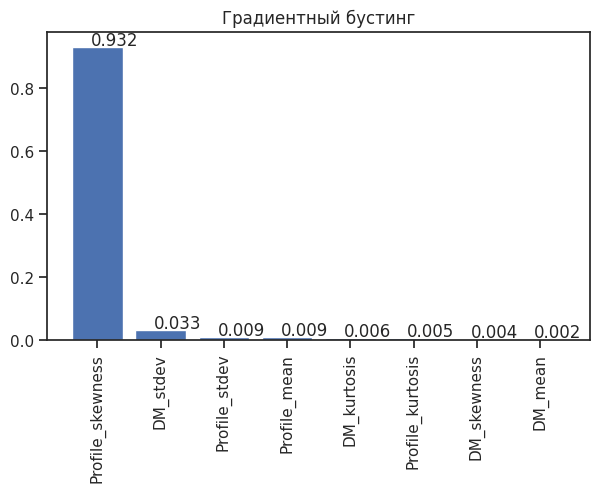

In [ ]:
_,_=draw_feature_importances(gbc1, htru_x, 'Градиентный бустинг')

In [ ]:
list(zip(htru_feature_names, SelectFromModel(gbc1).fit(htru_x, htru_y).get_support()))

[('Profile_mean', False),
 ('Profile_stdev', False),
 ('Profile_skewness', True),
 ('Profile_kurtosis', False),
 ('DM_mean', False),
 ('DM_stdev', False),
 ('DM_skewness', False),
 ('DM_kurtosis', False)]

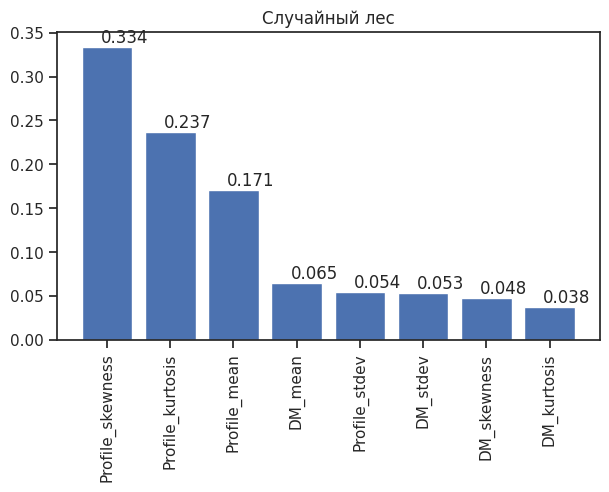

In [ ]:
_,_=draw_feature_importances(rfc1, htru_x, 'Случайный лес')

In [ ]:
list(zip(htru_feature_names, SelectFromModel(rfc1).fit(htru_x, htru_y).get_support()))

[('Profile_mean', True),
 ('Profile_stdev', False),
 ('Profile_skewness', True),
 ('Profile_kurtosis', True),
 ('DM_mean', False),
 ('DM_stdev', False),
 ('DM_skewness', False),
 ('DM_kurtosis', False)]